In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv('~/Downloads/Collected Data - 24 Sep 23:59:00.csv') 

In [22]:
data.head()

,Time,Cluster CPU,Cluster Memory,Order Management CPU Usage,User Account CPU Usage,Product Catalog CPU Usage,Review Rating CPU Usage,Shipping Logistics CPU Usage,Payment Processing CPU Usage,Order Management Memory Usage,...,User Account Request Count,Payment Processing Request Count,Review and Rating Request Count,Shipping and Logistics Request Count,Order Management 5xx Failures,Product Catalog 5xx Failures,Payment Processing 5xx Failures,Review and Rating 5xx Failures,Shipping and Logistics 5xx Failures,User Account 5xx Failures
0,2024-08-21 00:00:00,18.7,26.8,83.7%,59.7%,48.4%,40.6%,71.6%,57.3,51.7,...,3032.0,4424.0,5912.0,4506.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-08-21 00:01:00,19.8,27.0,95.4%,66.3%,39.0%,61.9%,75.1%,72.6,51.6,...,3298.0,4912.0,6892.0,5174.0,2.0,0.0,0.0,0.0,0.0,0.0
2,2024-08-21 00:02:00,20.8,27.0,87.5%,58.7%,53.8%,50.1%,59.2%,49.4,51.7,...,3462.0,5118.0,6688.0,5246.0,0.0,0.0,0.0,2.0,0.0,0.0
3,2024-08-21 00:03:00,20.7,27.0,86.5%,73.0%,35.1%,53.2%,74.1%,54.6,51.8,...,2970.0,4684.0,6106.0,4786.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024-08-21 00:04:00,20.3,27.0,83.8%,45.2%,42.6%,44.5%,65.7%,51.0,51.7,...,2750.0,4378.0,5922.0,4356.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
data.columns = data.columns.str.strip()

# Define a function to remove the % symbol and convert to float
def preprocess_percentage(value):
    if isinstance(value, str) and '%' in value:
        # Remove the % symbol and convert to float
        return float(value.replace('%', '')) # divide by 100 to convert percentage to decimal
    return value  # return the value unchanged if it does not contain %

# Apply the function to all columns
data = data.map(preprocess_percentage)


data_without_time = data.drop(columns=['Time'])  # add more column names if necessary
data_without_time.head()

,Cluster CPU,Cluster Memory,Order Management CPU Usage,User Account CPU Usage,Product Catalog CPU Usage,Review Rating CPU Usage,Shipping Logistics CPU Usage,Payment Processing CPU Usage,Order Management Memory Usage,User Account Memory Usage,...,User Account Request Count,Payment Processing Request Count,Review and Rating Request Count,Shipping and Logistics Request Count,Order Management 5xx Failures,Product Catalog 5xx Failures,Payment Processing 5xx Failures,Review and Rating 5xx Failures,Shipping and Logistics 5xx Failures,User Account 5xx Failures
0,18.7,26.8,83.7,59.7,48.4,40.6,71.6,57.3,51.7,28.2,...,3032.0,4424.0,5912.0,4506.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19.8,27.0,95.4,66.3,39.0,61.9,75.1,72.6,51.6,28.4,...,3298.0,4912.0,6892.0,5174.0,2.0,0.0,0.0,0.0,0.0,0.0
2,20.8,27.0,87.5,58.7,53.8,50.1,59.2,49.4,51.7,28.5,...,3462.0,5118.0,6688.0,5246.0,0.0,0.0,0.0,2.0,0.0,0.0
3,20.7,27.0,86.5,73.0,35.1,53.2,74.1,54.6,51.8,28.5,...,2970.0,4684.0,6106.0,4786.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20.3,27.0,83.8,45.2,42.6,44.5,65.7,51.0,51.7,28.5,...,2750.0,4378.0,5922.0,4356.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Display column names of the original DataFrame
column_names = data_without_time.columns.tolist()
print(column_names)

['Cluster CPU', 'Cluster Memory', 'Order Management CPU Usage', 'User Account CPU Usage', 'Product Catalog CPU Usage', 'Review Rating CPU Usage', 'Shipping Logistics CPU Usage', 'Payment Processing CPU Usage', 'Order Management Memory Usage', 'User Account Memory Usage', 'Payment Processing Memory Usage', 'Shipping Logistics Memory Usage', 'Product Catalog Memory Usage', 'Review Rating Memory Usage', 'Product Catalog Pod Count', 'Order Management Pod Count', 'Payment Processing Pod Count', 'Review Rating Pod Count', 'Shipping Logistics Pod Count', 'User Account Pod Count', 'Order Management Request Count', 'Product Catalog Request Count', 'User Account Request Count', 'Payment Processing Request Count', 'Review and Rating Request Count', 'Shipping and Logistics Request Count', 'Order Management 5xx Failures', 'Product Catalog 5xx Failures', 'Payment Processing 5xx Failures', 'Review and Rating 5xx Failures', 'Shipping and Logistics 5xx Failures', 'User Account 5xx Failures']


In [36]:
# Define the columns to include in the new DataFrame
order_columns_to_include = [
    'Cluster CPU',
    'Cluster Memory',
    'Order Management CPU Usage',
    'Order Management Memory Usage',
    'Order Management Request Count',
    'Order Management 5xx Failures',
    'Order Management Pod Count'
]
product_columns_to_include = [
    'Cluster CPU',
    'Cluster Memory',
    'Product Catalog CPU Usage',
    'Product Catalog Memory Usage',
    'Product Catalog Request Count',
    'Product Catalog 5xx Failures',
    'Product Catalog Pod Count'
]
shipping_columns_to_include = [
    'Cluster CPU',
    'Cluster Memory',
    'Shipping Logistics CPU Usage',
    'Shipping Logistics Memory Usage',
    'Shipping and Logistics Request Count',
    'Shipping and Logistics 5xx Failures',
    'Shipping Logistics Pod Count'
]
user_columns_to_include = [
    'Cluster CPU',
    'Cluster Memory',
    'User Account CPU Usage',
    'User Account Memory Usage',
    'User Account Request Count',
    'User Account 5xx Failures',
    'User Account Pod Count'
]
reviews_columns_to_include = [
    'Cluster CPU',
    'Cluster Memory',
    'Review Rating CPU Usage',
    'Review Rating Memory Usage',
    'Review and Rating Request Count',
    'Review and Rating 5xx Failures',
    'Review Rating Pod Count'
]
payment_columns_to_include = [
    'Cluster CPU',
    'Cluster Memory',
    'Payment Processing CPU Usage',
    'Payment Processing Memory Usage',
    'Payment Processing Request Count',
    'Payment Processing 5xx Failures',
    'Payment Processing Pod Count'
]

# Create the new DataFrame by selecting the specified columns
df_order= data_without_time[order_columns_to_include]
df_product = data_without_time[product_columns_to_include]
df_user = data_without_time[user_columns_to_include]
df_shipping = data_without_time[shipping_columns_to_include]
df_reviews = data_without_time[reviews_columns_to_include]
df_payment = data_without_time[payment_columns_to_include]


In [37]:
# Calculate the correlation matrix
order_correlation_matrix = df_order.corr()
product_correlation_matrix = df_product.corr()
user_correlation_matrix = df_user.corr()
shipping_correlation_matrix = df_shipping.corr()
reviews_correlation_matrix = df_reviews.corr()
payment_correlation_matrix = df_payment.corr()

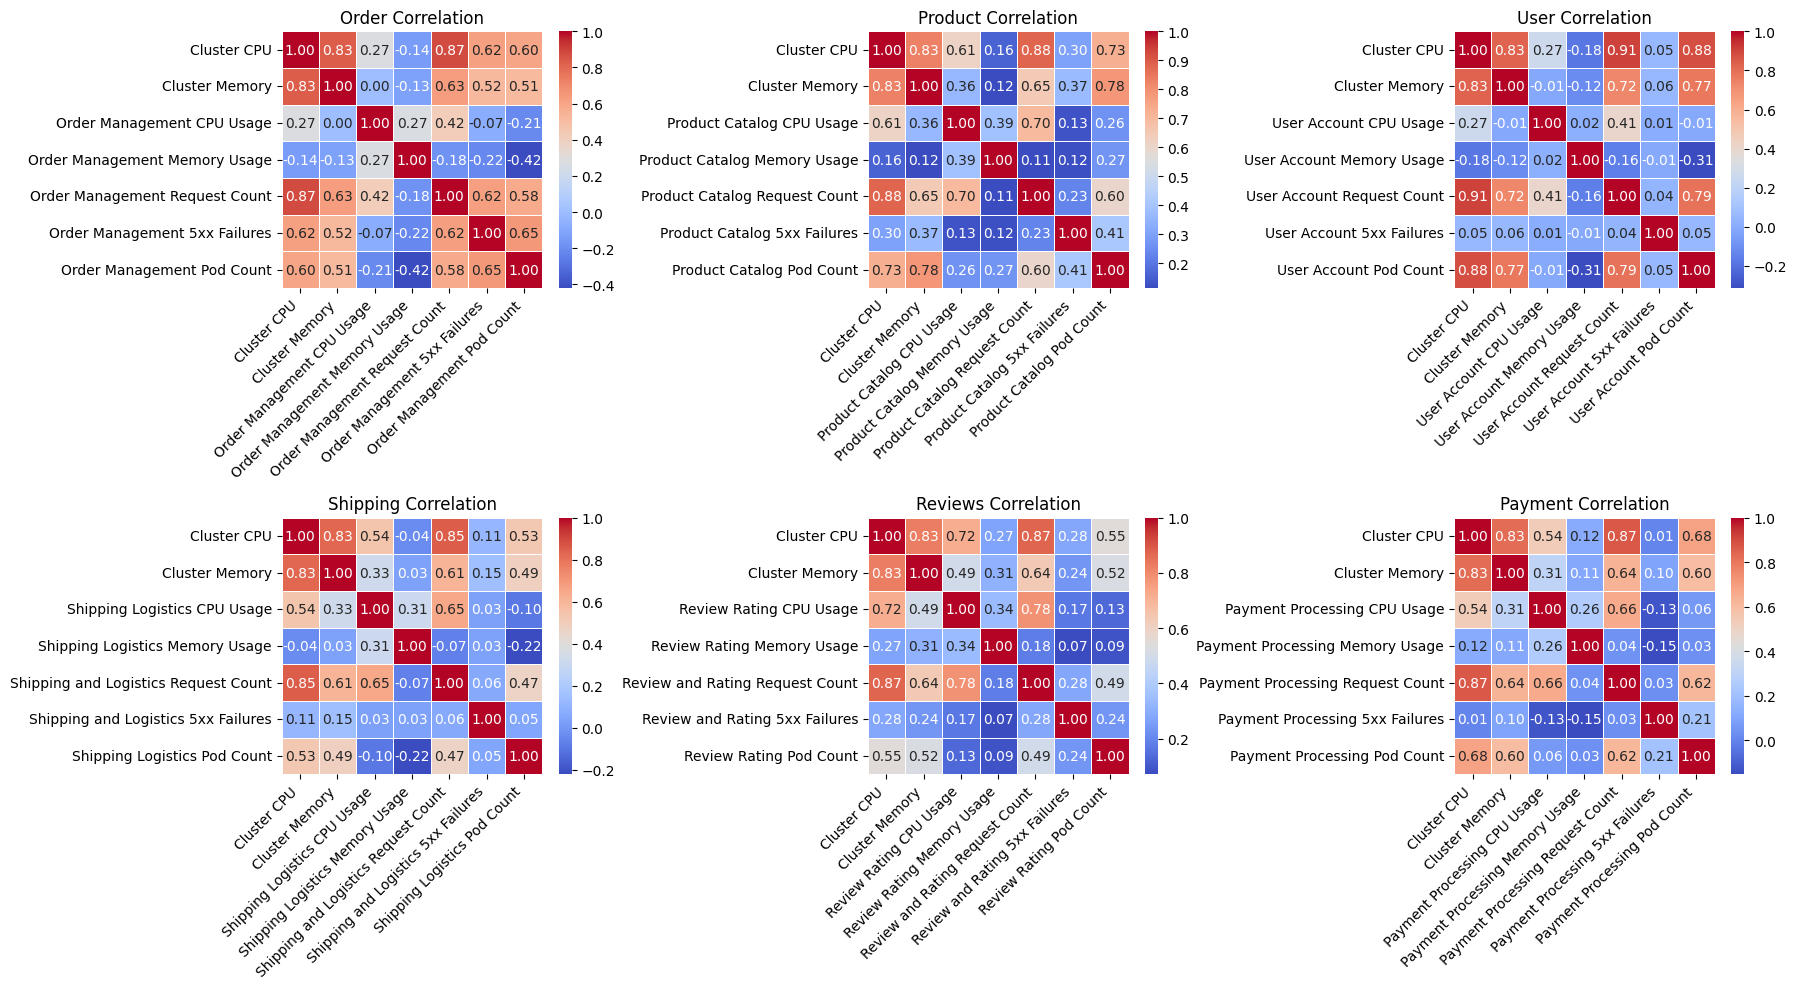

In [44]:
# Create a list of correlation matrices and their labels
correlation_matrices = [
    (order_correlation_matrix, 'Order Correlation'),
    (product_correlation_matrix, 'Product Correlation'),
    (user_correlation_matrix, 'User Correlation'),
    (shipping_correlation_matrix, 'Shipping Correlation'),
    (reviews_correlation_matrix, 'Reviews Correlation'),
    (payment_correlation_matrix, 'Payment Correlation'),
]

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # Flatten the array of axes for easy indexing

# Plot each heatmap
for ax, (corr_matrix, title) in zip(axes, correlation_matrices):
    sns.heatmap(corr_matrix, ax=ax, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Adjust layout
plt.tight_layout()

# Save the figure to a file
plt.savefig('correlation_matrices_heatmap.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()